## Calculate coherence & distinctiveness scores for seed dictionaries by decade

**Date created**: December 6, 2022

**Date last modified**: December 7, 2022

**Description**: This notebook calculates and visualizes the coherence score and distinctiveness score of core dictionaries over decades. Code for calculation based on code here: https://github.com/jhaber-zz/charters4textxd2018/blob/master/notebooks/wem_hackathon_TextXD18.ipynb

**Inputs:** 



*   decade word2vec models (models_storage/w2v_models)

```
wem_path1 = 'word2vec_phrased_filtered_enchant_300d_1970_1979_2022_oct30.bin'
wem_path2 = 'word2vec_phrased_filtered_enchant_300d_1980_1989_2022_oct30.bin'
wem_path3 = 'word2vec_phrased_filtered_enchant_300d_1990_1999_2022_oct30.bin'
wem_path4 = 'word2vec_phrased_filtered_enchant_300d_2000_2016_2022_oct30.bin'
```



*   seed terms for each perspective



```
demographic_core.txt
relational_core.txt
cultural_core.txt
```



**Outputs:** None






##Coherence scores over decades

In [120]:
import numpy as np
import pandas as pd
import gensim
import re
from gensim.models import KeyedVectors
from gensim.models import Word2Vec

In [53]:
def dict_cohere(thisdict, wem_model):
    '''Computes the average cosine similarity score of terms within one dictionary with all other terms in that same dictionary,
    effectively measuring the coherence of the dictionary.
    ...question for development: does it make sense to compare the average cosine similarity score between all terms 
    in thisdict and the average cosine similarity among the total model vocabulary? (Could that be, by definition, 0?)
    
    NOTE: For an unknown reason, calling this function deletes terms from thisdict.
    
    Inputs: List of key terms, word2vec model.
    Output: Average cosine similarity score of each word with all other words in the list of key terms.'''
    
    # Initialize average distance variables:

    sim_scores = []
    
    # Compute average cosine similarity score of each word with other dict words:
    for index in np.arange(len(thisdict)):
 
        other_words = thisdict[:index] + thisdict[index+1:]
        word = thisdict[index]
        sim_score_with_others = []
        for other in other_words:
          try:
            sim_score_with_others.append(wem_model.wv.similarity(word, other))
          except:
            pass
        
        if (len(sim_score_with_others)!=0):
          word_avg_sim = np.mean(sim_score_with_others)
          # print(word_avg_sim)
          sim_scores.append(word_avg_sim)# Add up each average distance, incrementally
     

    
    return np.mean(sim_scores)

In [7]:
def read_txt_lst(file):
    txt_file = open(file, "r")
    file_content = txt_file.read()
    # print("The file content are: ", file_content)

    content_list = file_content.split("\n")
    txt_file.close()
    return content_list


In [8]:
dem_core=read_txt_lst('demographic_core.txt')
rela_core=read_txt_lst('relational_core.txt')
cult_core = read_txt_lst('cultural_core.txt')


In [9]:
dem_core=[re.sub(r'\s','_',x) for x in dem_core]
rela_core=[re.sub(r'\s','_',x) for x in rela_core]
cult_core=[re.sub(r'\s','_',x) for x in cult_core]


     

In [10]:
core_lists = [dem_core,rela_core,cult_core]

In [12]:
wem_path1 = 'word2vec_phrased_filtered_enchant_300d_1970_1979_2022_oct30.bin'
wem_path2 = 'word2vec_phrased_filtered_enchant_300d_1980_1989_2022_oct30.bin'
wem_path3 = 'word2vec_phrased_filtered_enchant_300d_1990_1999_2022_oct30.bin'
wem_path4 = 'word2vec_phrased_filtered_enchant_300d_2000_2016_2022_oct30.bin'

m1 = gensim.models.Word2Vec.load(wem_path1)
m2 = gensim.models.Word2Vec.load(wem_path2)
m3 = gensim.models.Word2Vec.load(wem_path3)
m4 = gensim.models.Word2Vec.load(wem_path4)
models = [m1, m2, m3, m4]



In [71]:
years = ['1970-79','1980-89','1990-99','2000-16']

In [64]:
dem_1970_cohere = dict_cohere(dem_core,m1)
cult_1970_cohere = dict_cohere(cult_core,m1)
rela_1970_cohere = dict_cohere(rela_core,m1)

In [65]:
dem_1980_cohere = dict_cohere(dem_core,m2)
cult_1980_cohere = dict_cohere(cult_core,m2)
rela_1980_cohere = dict_cohere(rela_core,m2)

In [66]:
dem_1990_cohere = dict_cohere(dem_core,m3)
cult_1990_cohere = dict_cohere(cult_core,m3)
rela_1990_cohere = dict_cohere(rela_core,m3)

In [67]:
dem_2000_cohere = dict_cohere(dem_core,m4)
cult_2000_cohere = dict_cohere(cult_core,m4)
rela_2000_cohere = dict_cohere(rela_core,m4)

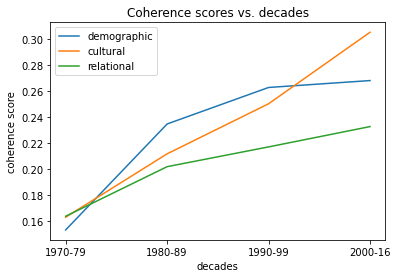

In [76]:
import matplotlib.pyplot as plt
plt.plot(years,[dem_1970_cohere,dem_1980_cohere,dem_1990_cohere,dem_2000_cohere], label='demographic')

plt.plot(years,[cult_1970_cohere,cult_1980_cohere,cult_1990_cohere,cult_2000_cohere], label='cultural')

plt.plot(years,[rela_1970_cohere,rela_1980_cohere,rela_1990_cohere,rela_2000_cohere], label='relational')

plt.xlabel('decades')
plt.ylabel('coherence score')

plt.title('Coherence scores vs. decades')

plt.legend();


##Distinctiveness scores over decades

### cosine distance

In [100]:
def dict_distinct(dict1, dict2, wem_model):
    '''Computes the average cosine distance score of terms in dict1 with all terms in dict2,
    effectively measuring the opposition/non-coherence between the two dictionaries.
    
    NOTE: For an unknown reason, calling this function deletes terms from thisdict.
    
    Inputs: List of key terms, word2vec model.
    Output: Average cosine distance score of each word in dict1 with all words in dict2.'''
    
    # Initialize average distance variables:
    # word_avg_dist = 0
    # word_avg_dists = 0
    # dicts_avg_dist = 0
    
    # # Compute average cosine similarity score of each term in dict1 with all terms in dict2:
    # for word in dict1:
    #     word_avg_dist = (wem_model.distances(word, other_words=dict2).sum())/len(dict2) # Total diffs of word with all other words, take average
    #     word_avg_dists += word_avg_dist # Add up each average distance, incrementally
    # dicts_avg_dist = word_avg_dists/len(dict1) # Find average cosine distance score by dividing sum by # words
    
    
    
    sim_scores = []
    
    # Compute average cosine similarity score of each word with other dict words:
    for index in np.arange(len(dict1)):
 
        other_words = dict2
        word = dict1[index]
        sim_score_with_others = []
        for other in other_words:
          try:
            sim_score_with_others.append(1-wem_model.wv.similarity(word, other))
          except:
            pass
        
        if (len(sim_score_with_others)!=0):
          word_avg_sim = np.mean(sim_score_with_others)
          # print(word_avg_sim)
          sim_scores.append(word_avg_sim)# Add up each average distance, incrementally
     

    
    return np.mean(sim_scores)



In [101]:
distinct_scores_decade_perspective= {}
for y,m in zip(years, models):
  distinct_scores_perspective={}
  for core,k in zip(['dem','rela','cult'],np.arange(3)):
    current_lst = core_lists[k]
    other_lsts = core_lists[:k] + core_lists[k+1:]
    distinct_scores_perspective[core]= np.mean([dict_distinct(current_lst, other_lsts[0], m), dict_distinct(current_lst, other_lsts[1], m)])
  distinct_scores_decade_perspective[y] = distinct_scores_perspective

In [104]:
import pandas as pd
distinct_results = pd.DataFrame(distinct_scores_decade_perspective).T
distinct_results

,dem,rela,cult
1970-79,0.884465,0.886354,0.883664
1980-89,0.857262,0.861675,0.855098
1990-99,0.842085,0.844281,0.838037
2000-16,0.815886,0.822824,0.813911


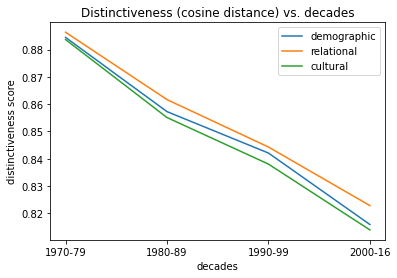

In [119]:
plt.plot(distinct_results['dem'], label='demographic')

plt.plot(distinct_results['rela'],label='relational')

plt.plot(distinct_results['cult'],label='cultural')

plt.xlabel('decades')
plt.ylabel('distinctiveness score')

plt.title('Distinctiveness (cosine distance) vs. decades')

plt.legend()

### WMD

In [118]:
def dict_distinct_wmd(dict1,dict2, wem_model):
    ''' 
    calculate WMD as distinctiveness score between (lists) dict1 and dict2
    '''
    return wem_model.wv.wmdistance(dict1,dict2)

In [114]:
distinct_scores_decade_perspective_wmd= {}
for y,m in zip(years, models):
  distinct_scores_perspective={}
  for core,k in zip(['dem','rela','cult'],np.arange(3)):
    current_lst = core_lists[k]
    other_lsts = core_lists[:k] + core_lists[k+1:]
    distinct_scores_perspective[core]= np.mean([dict_distinct_wmd(current_lst, other_lsts[0], m), dict_distinct_wmd(current_lst, other_lsts[1], m)])
  distinct_scores_decade_perspective_wmd[y] = distinct_scores_perspective

In [116]:
import pandas as pd
distinct_results_wmd = pd.DataFrame(distinct_scores_decade_perspective_wmd).T
distinct_results_wmd

,dem,rela,cult
1970-79,1.209573,1.244394,1.206527
1980-89,1.189036,1.223768,1.186556
1990-99,1.178282,1.202487,1.170234
2000-16,1.150582,1.175649,1.145244


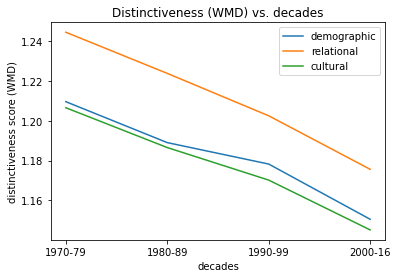

In [117]:
plt.plot(distinct_results_wmd['dem'], label='demographic')

plt.plot(distinct_results_wmd['rela'],label='relational')

plt.plot(distinct_results_wmd['cult'],label='cultural')

plt.xlabel('decades')
plt.ylabel('distinctiveness score (WMD)')

plt.title('Distinctiveness (WMD) vs. decades')

plt.legend()